In [1]:
# Nescessary imports

%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import os

# import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat

# set random seed
random.seed(42)

%load_ext autoreload

In [2]:
%autoreload 2
from classes.data_wraper import Dataset

In [3]:
""" channels = ['FOVfitting_2']
dataset = Dataset(channels) """
file = loadmat('data/mapsCeline_FOVfitting_2_pol-60.mat')

In [4]:
file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Acombine_outForCeline', 'Map1_outForCeline', 'Map2_outForCeline', 'Map3_outForCeline', 'Monit1_celine', 'Monit2_celine', 'Monit3_celine', 'OUT_Fa_celine', 'OUT_Fb_celine', 'TimeStamp1_outForCeline', 'TimeStamp2_outForCeline', 'TimeStamp3_outForCeline', 'coef1_outForCeline', 'coef2_outForCeline', 'coef3_outForCeline', 'mask1_outForceline', 'mask2_outForceline', 'mask3_outForceline', 'tint1_celine', 'tint2_celine', 'tint3_celine'])

In [8]:
%autoreload 2
from classes.utils import plot_map, get_center, plot_radial_profile

In [32]:
maps1 = file['Map1_outForCeline'][0]
coeffs1 = file['coef1_outForCeline'][0]
masks1 = file['mask1_outForceline'][0]
maps2 = file['Map2_outForCeline'][0]
coeffs2 = file['coef2_outForCeline'][0]
masks2 = file['mask2_outForceline'][0]
maps3 = file['Map3_outForCeline'][0]
coeffs3 = file['coef3_outForCeline'][0]
masks3 = file['mask3_outForceline'][0]
combined_maps = file['Acombine_outForCeline'][0]
azimuts = file['OUT_Fa_celine'][0]

285 325


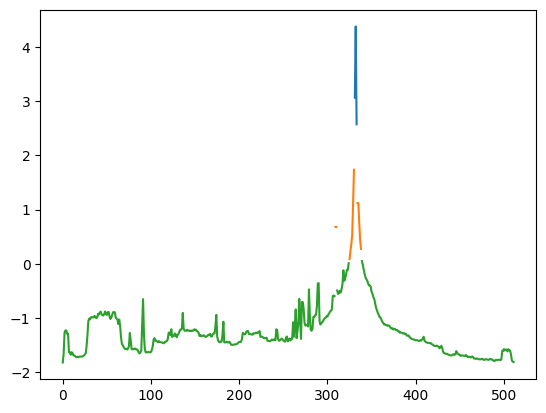

In [60]:
ind = random.randint(0, len(maps1)-1)
map1 = maps1[ind]
map2 = maps2[ind]
map3 = maps3[ind]
combined = combined_maps[ind]
azimut = azimuts[ind]
i, j = get_center(combined)
print(i,j)

#===================================================================================================
map1 = map1 * coeffs1[ind]
map2 = map2 * coeffs2[ind]
map3 = map3 * coeffs3[ind]

map1 = np.log10(np.abs(map1))
map2 = np.log10(np.abs(map2))
map3 = np.log10(np.abs(map3))
combined = np.log10(np.abs(combined))

map3 = map3 * (1 - masks3[ind])
map2 = map2 * (1 - masks2[ind]) * masks3[ind]
map1 = (map1 * (1 - masks1[ind]) * masks2[ind] * masks3[ind])

# remove 0 values
map1[map1 == 0] = np.nan
map2[map2 == 0] = np.nan
map3[map3 == 0] = np.nan

# show the 4 maps in one figure
""" fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(map1, cmap='jet')
ax[0,0].set_title('Map1')
ax[0,1].imshow(map2, cmap='jet')
ax[0,1].set_title('Map2')
ax[1,0].imshow(map3, cmap='jet')
ax[1,0].set_title('Map3')
ax[1,1].imshow(combined, cmap='jet')
ax[1,1].set_title('Combined')
plt.show() """

# plot radial profile
plot_radial_profile([map1, map2, map3], azimut)

235 315


In [99]:
""" ind = random.randint(0, len(dataset.map1_list)-1)
orig = dataset.combined_list[ind].copy()
dataset.preprocess_data()
preprocessed = dataset.combined_list[ind]
reversed = dataset.rev_preprocess(preprocessed, ind)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(orig)
ax[0].set_title('Original')
cbar = fig.colorbar(ax[0].imshow(orig), ax=ax[0])
cbar.ax.set_ylabel('Intensity', rotation=270)

ax[1].imshow(reversed)
ax[1].set_title('Reversed')
cbar = fig.colorbar(ax[1].imshow(reversed), ax=ax[1])
cbar.ax.set_ylabel('Intensity', rotation=270)

plt.show()

print('Max difference: ', np.max(np.abs(orig - reversed)))
print('Mean difference: ', np.mean(np.abs(orig - reversed)))
print('Mean squared difference: ', np.mean(np.square(orig - reversed))) """

" ind = random.randint(0, len(dataset.map1_list)-1)\norig = dataset.combined_list[ind].copy()\ndataset.preprocess_data()\npreprocessed = dataset.combined_list[ind]\nreversed = dataset.rev_preprocess(preprocessed, ind)\n\nfig, ax = plt.subplots(1, 2, figsize=(15, 15))\nax[0].imshow(orig)\nax[0].set_title('Original')\ncbar = fig.colorbar(ax[0].imshow(orig), ax=ax[0])\ncbar.ax.set_ylabel('Intensity', rotation=270)\n\nax[1].imshow(reversed)\nax[1].set_title('Reversed')\ncbar = fig.colorbar(ax[1].imshow(reversed), ax=ax[1])\ncbar.ax.set_ylabel('Intensity', rotation=270)\n\nplt.show()\n\nprint('Max difference: ', np.max(np.abs(orig - reversed)))\nprint('Mean difference: ', np.mean(np.abs(orig - reversed)))\nprint('Mean squared difference: ', np.mean(np.square(orig - reversed))) "

In [34]:
dataset.preprocess_data()

In [160]:
dataset.crop_data(128)

In [7]:
%autoreload 2
from classes.utils import plot_map, plot_radial_profile
from scipy.ndimage import rotate

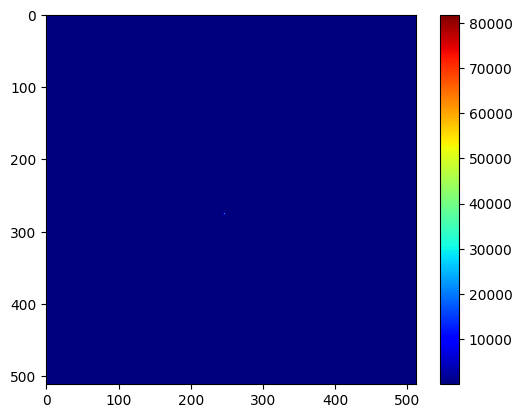

In [8]:
ind = random.randint(0, len(df)-1)
map1 = df['map1'][ind]
map2 = df['map2'][ind]
map3 = df['map3'][ind]
combined = df['combined'][ind]
plot_map(map1)
plot_map(map2)
plot_map(map3)
plot_map(combined)

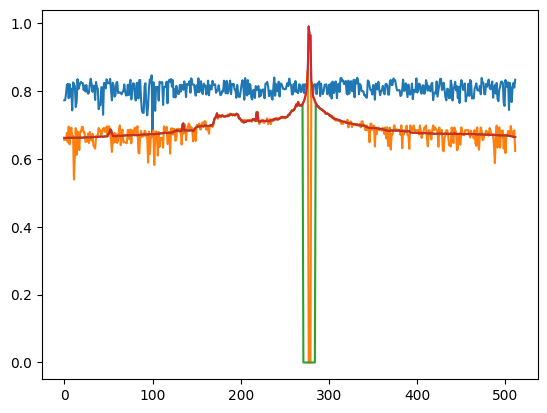

In [49]:
ind = random.randint(0, len(df)-1)
map1 = df['map1'][ind]
#map1 = np.log10(np.abs(map1) + 1e-10)
map2 = df['map2'][ind]
#map2 = np.log10(np.abs(map2) + 1e-10)
map3 = df['map3'][ind]
#map3 = np.log10(np.abs(map3) + 1e-10)
combined = df['combined'][ind]
azimuth = df['azimut'][ind]
plot_radial_profile([map1, map2, map3, combined], azimuth)